In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from matplotlib import pyplot as plt, colors
from sklearn.metrics import mean_squared_error, make_scorer

***ЗАДАНИЕ 1***

Загрузите набор данных Glass из пакета “mlbench”. Набор данных (признаки, классы) был изучен в работе «Метод ближайших соседей». Постройте дерево классификации для модели, задаваемой следующей формулой: Type ~ ., дайте интерпретацию полученным результатам. При рисовании дерева используйте параметр cex=0.7 для уменьшения размера текста на рисунке, например, text(bc.tr,cex=0.7) или draw.tree(bc.tr,cex=0.7). Является ли построенное дерево избыточным? Выполните все операции оптимизации дерева.

In [3]:
data = pd.read_csv("glass.data", header=None)
data = data.drop(0, axis=1)
data = data.rename(columns={i - 1: i for i in range(2, 12)})
data.head()

,2,3,4,5,6,7,8,9,10,11
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X, y = data.drop(11, axis=1), data[11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
clf = DecisionTreeClassifier()#(min_impurity_decrease=0.005)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7209302325581395

[Text(3055.3706896551726, 4193.4857142857145, 'X[7] <= 0.335\ngini = 0.724\nsamples = 171\nvalue = [59, 62, 14, 9, 6, 21]'),
 Text(2057.2241379310344, 3882.857142857143, 'X[3] <= 1.42\ngini = 0.672\nsamples = 150\nvalue = [58, 61, 14, 8, 6, 3]'),
 Text(984.5172413793103, 3572.2285714285717, 'X[2] <= 2.785\ngini = 0.603\nsamples = 94\nvalue = [52, 26, 11, 1, 2, 2]'),
 Text(410.48275862068965, 3261.6000000000004, 'X[0] <= 1.521\ngini = 0.514\nsamples = 12\nvalue = [0, 8, 0, 1, 2, 1]'),
 Text(307.8620689655172, 2950.971428571429, 'X[1] <= 13.755\ngini = 0.722\nsamples = 6\nvalue = [0, 2, 0, 1, 2, 1]'),
 Text(205.24137931034483, 2640.3428571428576, 'X[3] <= 1.01\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 0, 1, 0, 1]'),
 Text(102.62068965517241, 2329.714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(307.8620689655172, 2329.714285714286, 'X[5] <= 1.515\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 0, 1]'),
 Text(205.24137931034483, 2019.0857142857144, 'gini = 0.0\n

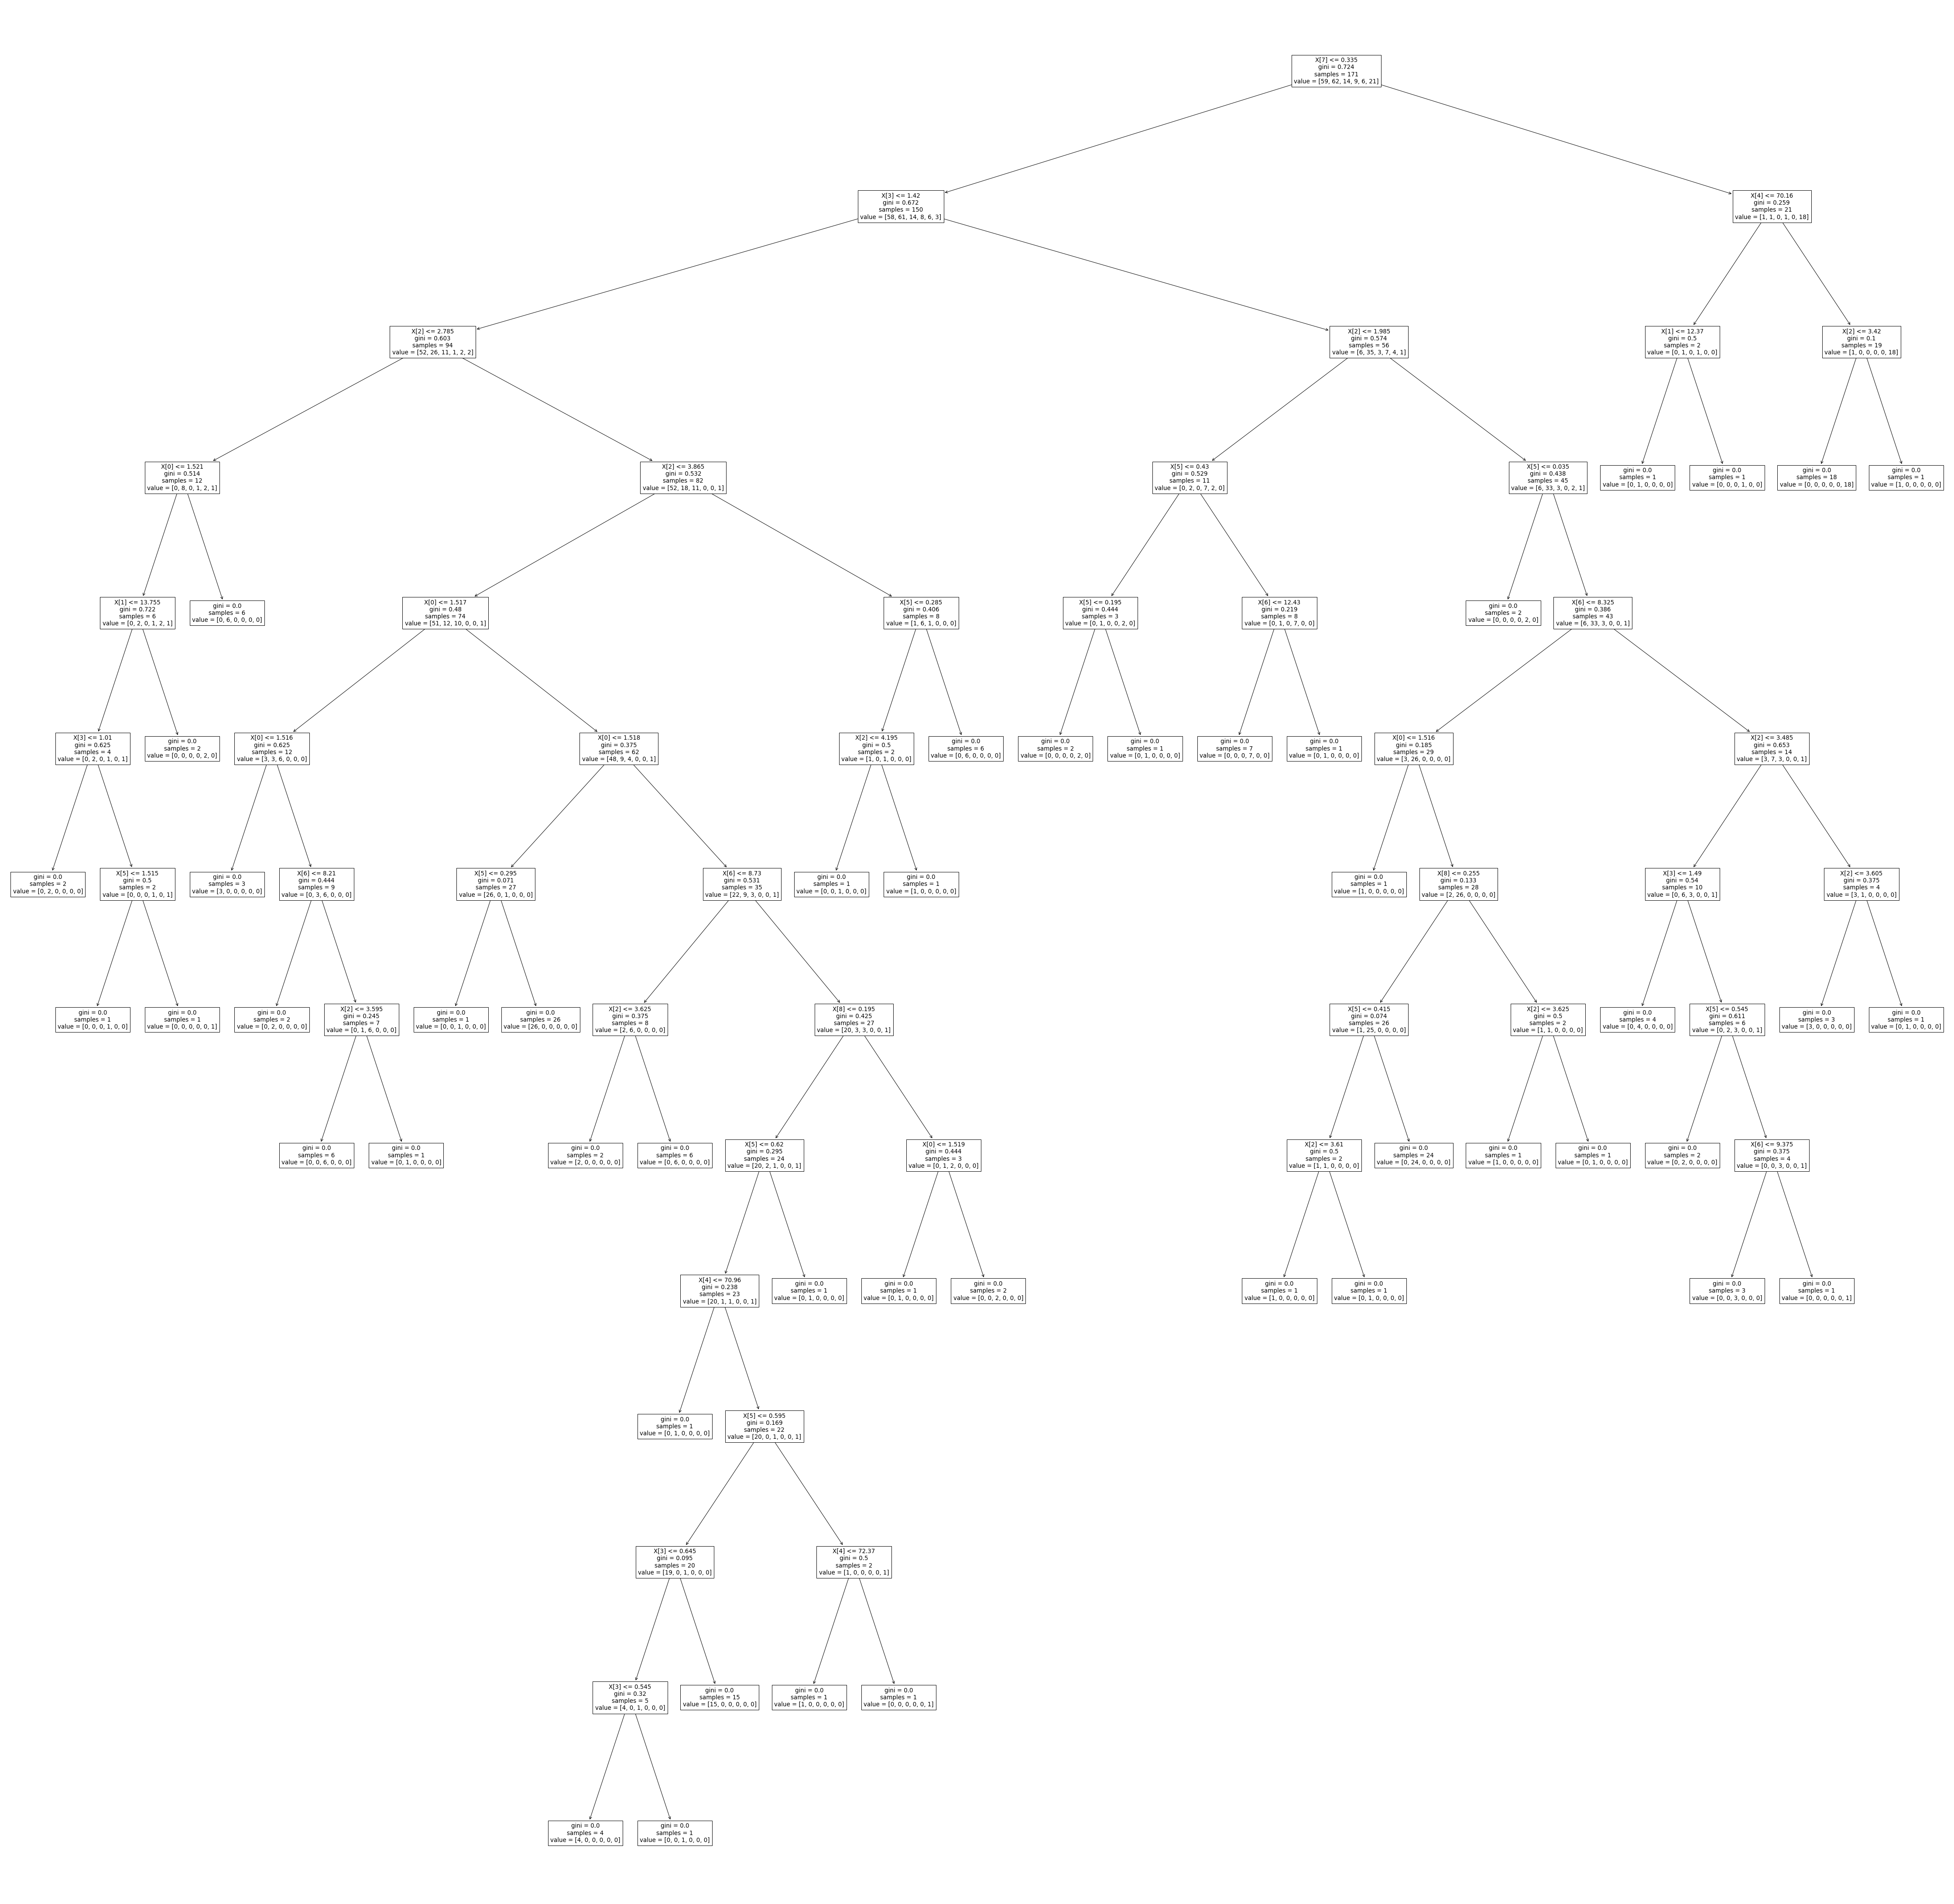

In [80]:
fig, ax = plt.subplots()
fig.set_figwidth(80)
fig.set_figheight(80)
ax.set_figure(fig)
plot_tree(clf, ax=ax)

0.8837209302325582


[Text(1571.1483050847457, 2053.6, 'X[7] <= 0.335\ngini = 0.724\nsamples = 171\nvalue = [59, 62, 14, 9, 6, 21]'),
 Text(1137.2796610169491, 1812.0, 'X[3] <= 1.42\ngini = 0.672\nsamples = 150\nvalue = [58, 61, 14, 8, 6, 3]'),
 Text(572.1864406779661, 1570.4, 'X[2] <= 2.785\ngini = 0.603\nsamples = 94\nvalue = [52, 26, 11, 1, 2, 2]'),
 Text(226.9830508474576, 1328.8, 'X[0] <= 1.521\ngini = 0.514\nsamples = 12\nvalue = [0, 8, 0, 1, 2, 1]'),
 Text(151.32203389830508, 1087.2, 'X[1] <= 13.755\ngini = 0.722\nsamples = 6\nvalue = [0, 2, 0, 1, 2, 1]'),
 Text(75.66101694915254, 845.5999999999999, 'gini = 0.625\nsamples = 4\nvalue = [0, 2, 0, 1, 0, 1]'),
 Text(226.9830508474576, 845.5999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(302.64406779661016, 1087.2, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0, 0]'),
 Text(917.3898305084746, 1328.8, 'X[2] <= 3.865\ngini = 0.532\nsamples = 82\nvalue = [52, 18, 11, 0, 0, 1]'),
 Text(662.0338983050847, 1087.2, 'X[0] <= 1.517\n

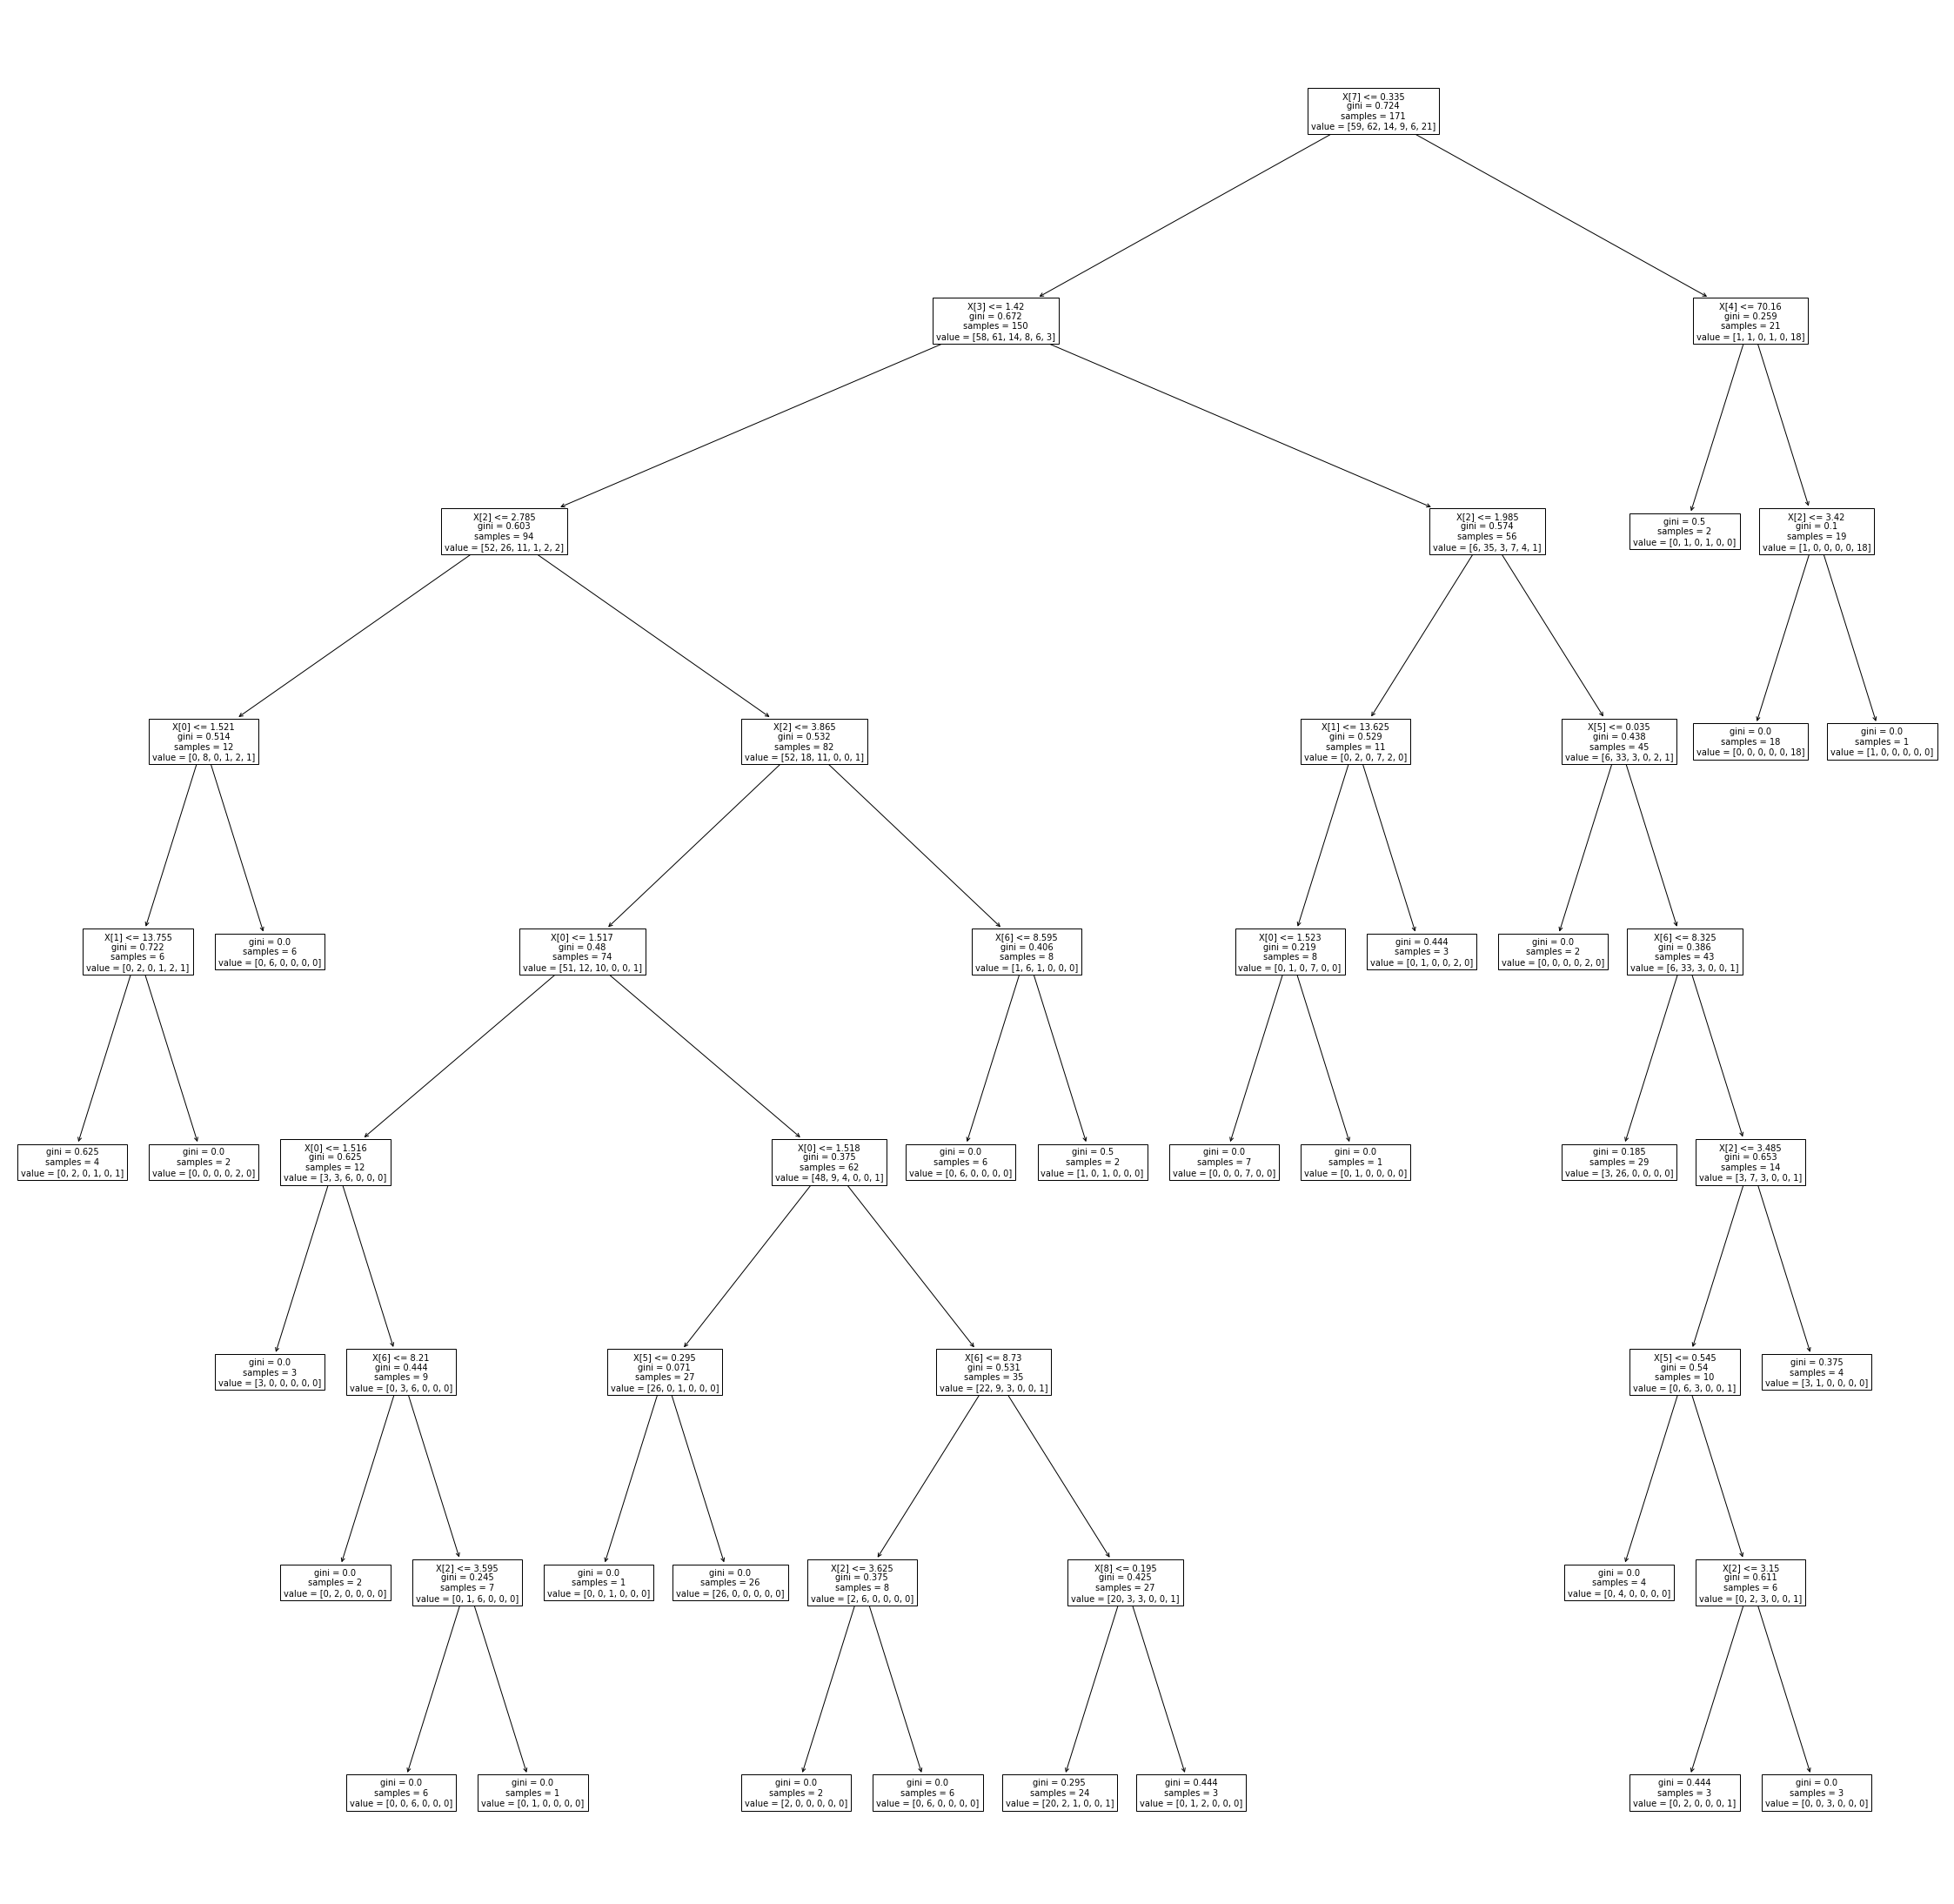

In [81]:
# сделаем дерево поменьше
clf = DecisionTreeClassifier(min_impurity_decrease=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
fig, ax = plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(40)
ax.set_figure(fig)
plot_tree(clf, ax=ax)

In [101]:
clf = DecisionTreeClassifier()
params = {'min_impurity_decrease': [0.01]}#(0.07, 0.05, 0.03, 0.01, 0.009, 0.008, 0.07, 0.006, 0.005, 0.002)}
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)
gs.best_score_, gs.best_estimator_

(0.6166112956810631, DecisionTreeClassifier(min_impurity_decrease=0.01))

In [119]:
# вот это достаточно странно
gs.best_estimator_.score(X, y)

0.8271028037383178

***ЗАДАНИЕ 2***

Загрузите набор данных spam7 из пакета DAAG. Постройте дерево классификации для модели, задаваемой следующей формулой: yesno ~., дайте интерпретацию полученным результатам. Запустите процедуру “cost-complexity prunning” с выбором параметра k по умолчанию, method = ’misclass’, выведите полученную последовательность деревьев. Какое из полученных деревьев, на Ваш взгляд, является оптимальным? Объясните свой выбор.

In [12]:
data = pd.read_csv("spambase.data", header=None)
last_col = len(data.columns) - 1
X, y = data.drop(columns=[last_col]), data[last_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
#params = {'ccp_alpha': [i for i in np.arange(0.001, 0.01, 0.001)] + [i for i in np.arange(0.01, 0.1, 0.01)]}
ccps = [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
        [i for i in np.arange(0.01, 0.1, 0.01)]
scores = []
for ccp_alpha in ccps:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    print(ccp_alpha, clf.score(X_test, y_test), clf.tree_.node_count)
    scores.append((clf.score(X_test, y_test), clf.tree_.node_count))
#gs = GridSearchCV(clf, param_grid=params, cv=5)
#gs.fit(X, y)
#gs.best_estimator_.score(X_test, y_test)

0.0001 0.9262472885032538 511
0.0002 0.9197396963123644 493
0.00030000000000000003 0.93058568329718 363
0.0004 0.9436008676789588 249
0.0005 0.9349240780911063 163
0.0006000000000000001 0.9414316702819957 149
0.0007000000000000001 0.9392624728850325 135
0.0008 0.9370932754880694 133
0.0009000000000000001 0.9349240780911063 109
0.001 0.9370932754880694 89
0.002 0.9154013015184381 43
0.003 0.9088937093275488 23
0.004 0.9088937093275488 23
0.005 0.8980477223427332 17
0.006 0.8915401301518439 13
0.007 0.8915401301518439 13
0.008 0.8915401301518439 13
0.009000000000000001 0.8915401301518439 13
0.01 0.8915401301518439 13
0.02 0.8568329718004338 7
0.03 0.8568329718004338 7
0.04 0.8221258134490239 5
0.05 0.8221258134490239 5
0.060000000000000005 0.8221258134490239 5
0.06999999999999999 0.8221258134490239 5
0.08 0.7613882863340564 3
0.09 0.7613882863340564 3


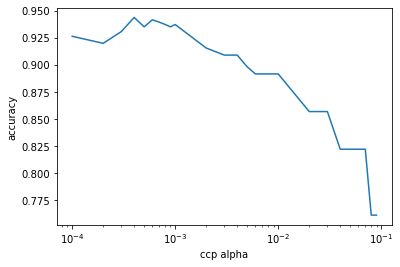

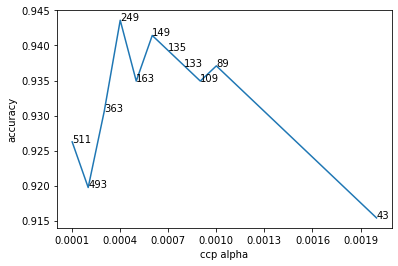

In [41]:
scores = np.array(scores)
plt.plot(ccps, scores[:, 0])
plt.xlabel('ccp alpha')
plt.ylabel('accuracy')
plt.xscale('log')
plt.show()

plt.plot(ccps[: 11], scores[:, 0][: 11],)
plt.xlabel('ccp alpha')
plt.ylabel('accuracy')
plt.xticks(np.arange(np.min(ccps[: 11]), np.max(ccps[: 11]), 0.0003))
for i in range(len(ccps[: 11])):
    plt.text(ccps[i], scores[:, 0][i], int(scores[:, 1][i]))

In [40]:
params = {'ccp_alpha': [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
          [i for i in np.arange(0.01, 0.1, 0.01)]}
clf = DecisionTreeClassifier()
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)
print(gs.best_estimator_.score(X_test, y_test))
gs.best_estimator_.tree_.node_count, gs.best_estimator_

0.9609544468546638


(129, DecisionTreeClassifier(ccp_alpha=0.0007000000000000001))

***ЗАДАНИЕ 3***

Загрузите набор данных nsw74psid1 из пакета DAAG. Постройте регрессионное дерево для модели, задаваемой следующей формулой: re78 ~.. Постройте регрессионную модель и SVM-регрессию для данной формулы. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор.

In [74]:
data = pd.read_csv('nsw74psid1.csv')
data = data.drop("Unnamed: 0", axis=1)
data.head()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
0,0,47,12,0,0,0,0,0.0,0.0,0.0
1,0,50,12,1,0,1,0,0.0,0.0,0.0
2,0,44,12,0,0,0,0,0.0,0.0,0.0
3,0,28,12,1,0,1,0,0.0,0.0,0.0
4,0,54,12,0,0,1,0,0.0,0.0,0.0


In [75]:
#X, y = data.drop(['re78'], axis=1), data.re78
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [76]:
scaler = StandardScaler()
scaler.fit(data)
data_norm = scaler.transform(data)
X_norm, y_norm = data_norm[:, : X.shape[1]], data_norm[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.1)

In [129]:
X_train.shape

(2407, 9)

In [77]:
def my_mse(y_true, y_pred):
    d = y_true - y_pred
    if (d * d < 0).any():
        print(d)
    return np.mean(np.square(d))

tree = DecisionTreeRegressor()
#tree.fit(X, y)
#mean_squared_error(tree.predict(X), y)
ccps = [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
        [i for i in np.arange(0.01, 0.1, 0.01)]
params = {'ccp_alpha': ccps}
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))
gs.fit(X_norm, y_norm)
gs.best_estimator_, gs.best_score_

(DecisionTreeRegressor(ccp_alpha=0.02), -0.6147932055150727)

In [79]:
tree = DecisionTreeRegressor(ccp_alpha=0.01)
tree.fit(X_train, y_train)
mean_squared_error(tree.predict(X_test), y_test)

0.410720044137052

In [119]:
svm = SVR(kernel='rbf', epsilon=0.25, C=3, degree=3, gamma=0.004)
svm.fit(X_train, y_train)
mean_squared_error(svm.predict(X_test), y_test)

0.34325833422281427

In [126]:
data_norm[3]

array([-0.27257511, -0.59305259,  0.00183672,  1.55868123, -0.18872599,
        0.46941103, -0.70671031, -1.3287478 , -1.28653394, -1.31176607])

***ЗАДАНИЕ 4***

Загрузите набор данных Lenses Data Set из файла Lenses.txt: 

3 класса (последний столбец): 1 : пациенту следует носить жесткие контактные линзы, 2 : пациенту следует носить мягкие контактные линзы, 3 : пациенту не следует носить контактные линзы. 
Признаки (категориальные): 
1. возраст пациента: (1) молодой, (2) предстарческая дальнозоркость, (3) старческая дальнозоркость 
2. состояние зрения: (1) близорукий, (2) дальнозоркий 
3. астигматизм: (1) нет, (2) да 
4. состояние слезы: (1) сокращенная, (2) нормальная

Постройте дерево решений. Какие линзы надо носить при предстарческой дальнозоркости, близорукости, при наличии астигматизма и сокращенной слезы?


In [163]:
data = pd.read_csv('Lenses.txt', sep='\s+', header=None)
data = data.drop(0, axis=1)
data = data.rename(columns={1: 'возраст', 2: 'сост. зрения', 3: 'астигматизм', 4: 'сост. слезы'})
#data.rename(columns={1: 'fff', 2: 'aaa', 3: 'bbb', 4: 'ttt'}, inplace=True)
data.head()

,возраст,сост. зрения,астигматизм,сост. слезы,5
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [164]:
X, y = data.drop(5, axis=1), data[5]

In [165]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

[Text(223.20000000000002, 342.46799999999996, 'X[3] <= 1.5\ngini = 0.538\nsamples = 24\nvalue = [4, 5, 15]'),
 Text(148.8, 266.364, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(297.6, 266.364, 'X[2] <= 1.5\ngini = 0.653\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(148.8, 190.26, 'X[0] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(74.4, 114.156, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(223.20000000000002, 114.156, 'X[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(148.8, 38.051999999999964, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(297.6, 38.051999999999964, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.40000000000003, 190.26, 'X[1] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(372.0, 114.156, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(520.8000000000001, 114.156, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(446.40000000000003, 38.051999999999964, 'gini = 0.0\nsamples 

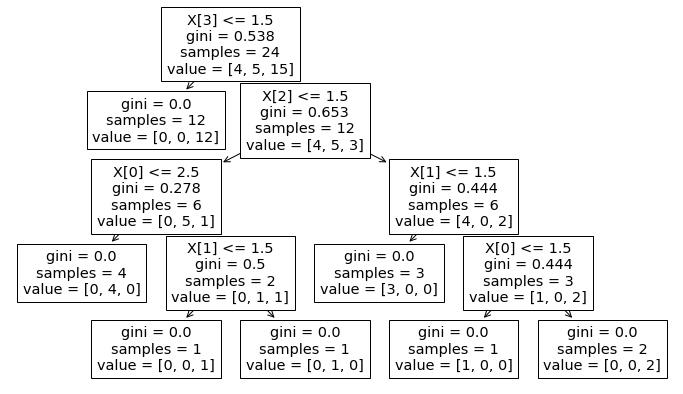

In [166]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(7)
plot_tree(tree)

Какие линзы надо носить при предстарческой дальнозоркости, близорукости, при наличии астигматизма и сокращенной слезы?

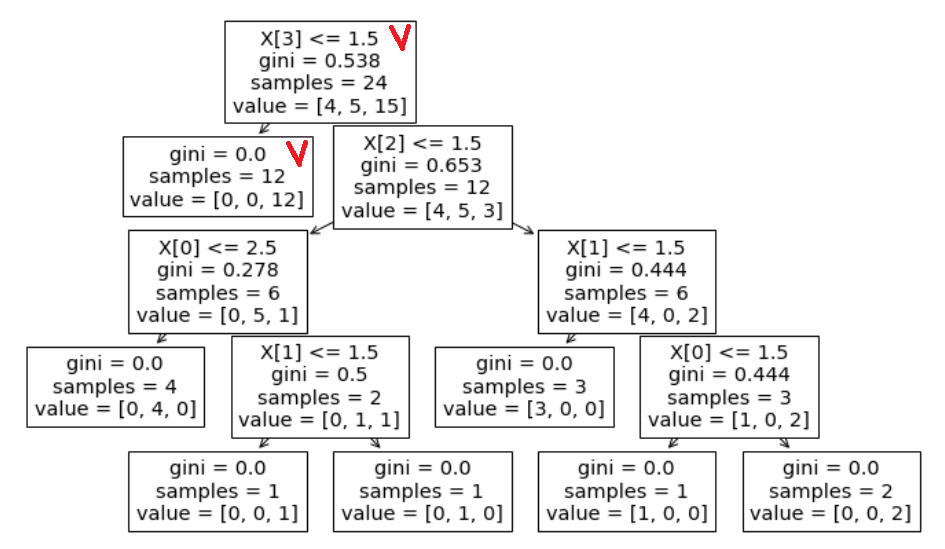

(класс 3 - линзы носить не надо)

In [167]:
tree.predict([[2, 1, 2, 1]])

array([3], dtype=int64)


***ЗАДАНИЕ 5***

Постройте дерево решений для обучающего множества Glass, данные которого характеризуются 10-ю признаками: 
  \1. Id number: 1 to 214; 2. RI: показатель преломления; 3. Na: сода (процент содержания в соотвествующем оксиде); 4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.
Классы характеризуют тип стекла:

  (1) окна зданий, плавильная обработка
  
  (2) окна зданий, не плавильная обработка
  
  (3) автомобильные окна, плавильная обработка
  
  (4) автомобильные окна, не плавильная обработка (нет в базе)
  
  (5) контейнеры
  
  (6) посуда
  
  (7) фары
  
Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. Это выполняется командой glass <- glass[,-1].

Определите, к какому типу стекла относится экземпляр с характеристиками 
RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.

In [168]:
data = pd.read_csv("glass.data", header=None)
data = data.drop(0, axis=1)
data = data.rename(columns={i - 1: i for i in range(2, 12)})
data.head()

,2,3,4,5,6,7,8,9,10,11
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [169]:
X, y = data.drop(11, axis=1), data[11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
clf = DecisionTreeClassifier()
ccps = [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
        [i for i in np.arange(0.01, 0.1, 0.01)] + [i for i in np.arange(0.1, 0.7, 0.1)]
params = {'ccp_alpha': ccps}
gs = GridSearchCV(clf, param_grid=params, cv=9)
gs.fit(X, y)
gs.best_estimator_, gs.best_score_

(DecisionTreeClassifier(ccp_alpha=0.02), 0.6867954911433172)

In [270]:
clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7906976744186046

In [271]:
# RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0
clf.predict([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0]])

array([2], dtype=int64)

*Класс 2 -- окна зданий, не плавильная обработка*

***ЗАДАНИЕ 6***

Для построения классификатора используйте заранее сгенерированные обучающие и тестовые выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt

,X1,X2,Colors
1,11.503087,-0.872017,green
2,6.952235,-0.368240,red
3,9.157642,1.058048,green
4,3.921632,1.703045,green
5,4.019569,0.706163,green


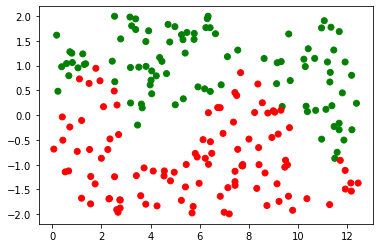

In [275]:
data = pd.read_csv("svmdata4.txt", sep='\t')
test_data = pd.read_csv("svmdata4test.txt", sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [274]:
X, y = data.drop("Colors", axis=1), data.Colors
clf = DecisionTreeClassifier()
ccps = [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
        [i for i in np.arange(0.01, 0.1, 0.01)] + [i for i in np.arange(0.1, 0.7, 0.1)]
params = {'ccp_alpha': ccps}
gs = GridSearchCV(clf, param_grid=params)
gs.fit(X, y)
gs.best_score_, gs.best_estimator_

(0.93, DecisionTreeClassifier(ccp_alpha=0.008))

In [303]:
X_test, y_test = test_data.drop("Colors", axis=1), test_data.Colors

clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf.fit(X, y)
clf.score(X_test, y_test), gs.best_estimator_.score(X_test, y_test)

(0.9, 0.9)

In [304]:
def plot_contour(clf, data):
    h = 0.02
    xx, yy = np.meshgrid(np.arange(data.X1.min(), data.X1.max(), h),
                         np.arange(data.X2.min(), data.X2.max(), h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if i == 'red' else 0 for i in Z])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors.ListedColormap(['g', 'r']))

    plt.scatter(data.X1, data.X2, c=data.Colors)

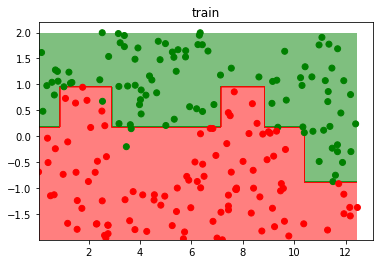

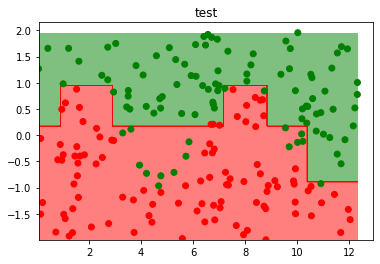

In [306]:
plot_contour(clf, data)
plt.title('train')
plt.show()
plot_contour(clf, test_data)
plt.title('test')
pass

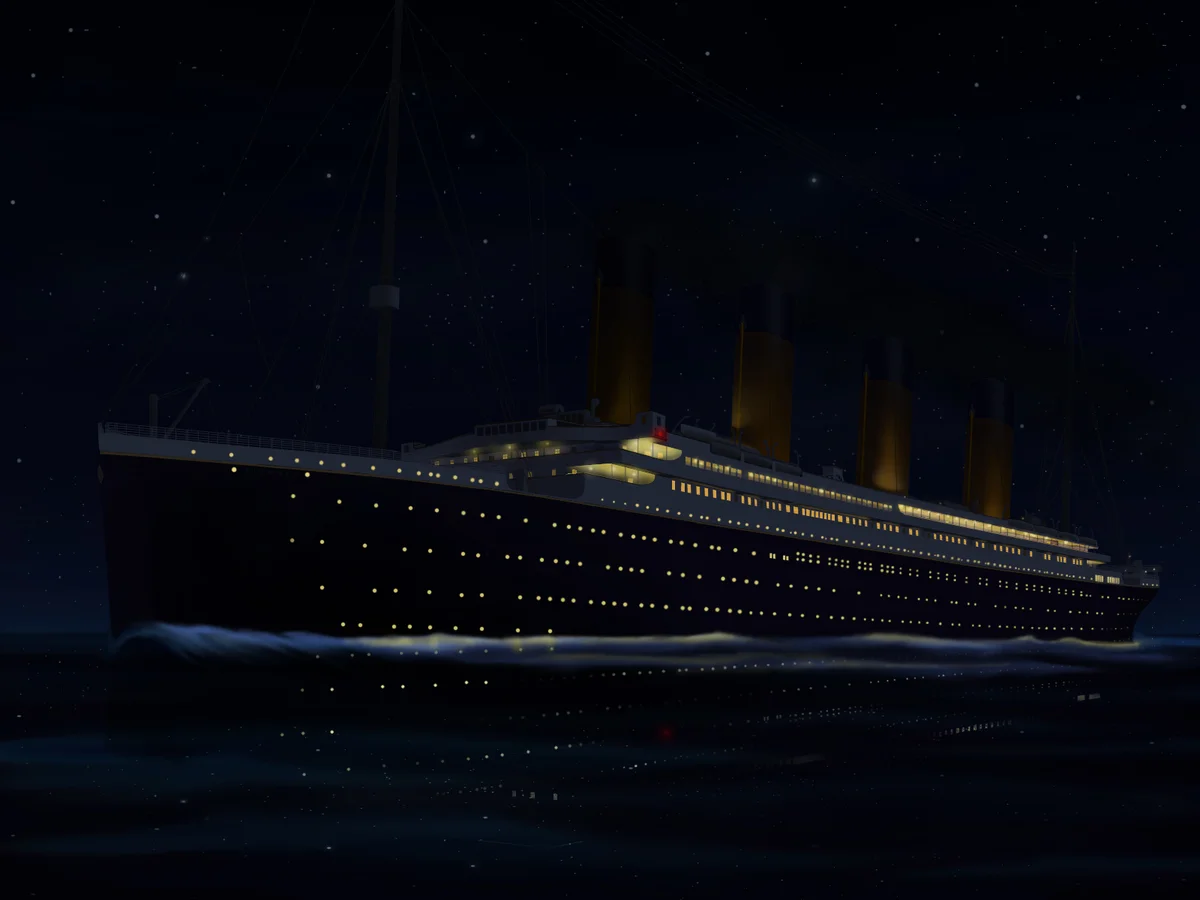

***ЗАДАНИЕ 7***

Разработать классификатор на основе дерева решений для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic
Исходные обучающие данные для классификации – в файле Titanic_train.csv
Данные для тестирования – в файле Titanic_test.csv

In [307]:
data_train = pd.read_csv("train.csv", index_col=False)
data_test = pd.read_csv("test.csv", index_col=False)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [308]:
def fillna(column) -> pd.Series:
    filtered = column[column.notna()]
    return column.fillna(value=filtered.mean())

def get_X(dataset):
    X = dataset.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
    if "Survived" in X.columns:
        X = X.drop("Survived", axis=1)
    X.Sex = X.Sex.map(lambda s: int(s == 'male')) # пропущенных значений пола в датасете нет (nunique() == 2)
    # теперь заполним пропуски в X.Age (средним значением)
    X.Age = fillna(X.Age)
    X.Fare = fillna(X.Fare)
    return X

def get_y(dataset):
    return dataset.Survived

In [309]:
X, y = get_X(data_train), get_y(data_train)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [317]:
clf = DecisionTreeClassifier()
ccps = [i for i in np.arange(0.0001, 0.001, 0.0001)] + [i for i in np.arange(0.001, 0.01, 0.001)] +\
        [i for i in np.arange(0.01, 0.1, 0.01)] + [i for i in np.arange(0.1, 0.7, 0.1)]
params = {'ccp_alpha': ccps}
gs = GridSearchCV(clf, param_grid=params)
gs.fit(X, y)
gs.best_score_, gs.best_estimator_

(0.819358483459921, DecisionTreeClassifier(ccp_alpha=0.002))

In [316]:
clf = gs.best_estimator_
X_test = get_X(data_test)
y_pred = clf.predict(X_test)
res = pd.DataFrame(data={'PassengerId': [i for i in range(892, 1310)], 'Survived': y_pred})
res.to_csv('out.csv', index=False)
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


*Пока что лучшая точность*

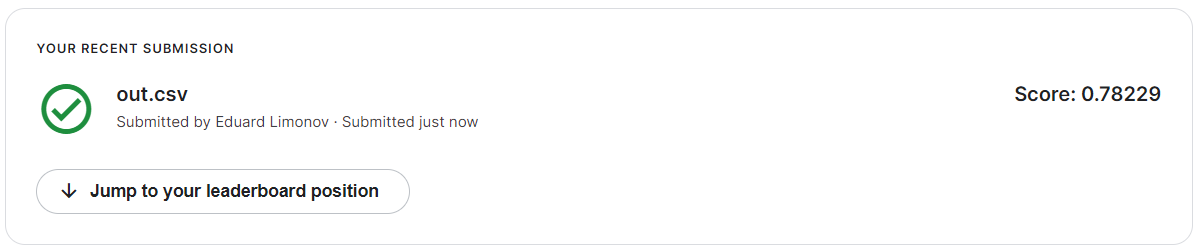